- 데이터셋 : iris.csv
 * 피쳐/특성/데이터 : sepal.length, sepal.width, petal.length (다변량)
 * 타겟/정답/레이블 : petal.width 
- 학습종류 : 지도학습 - 회귀
- 알고리즘 : 데이터셋 분석 후 결정 

In [2]:
# [1-1] 모듈 로딩
from sklearn.linear_model import LinearRegression												# 머신러닝 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error	# 성능평가 모듈
from sklearn.model_selection import train_test_split											# 데이터셋 분리 모듈
import matplotlib.pyplot as plt
import pandas as pd    

In [3]:
# [1-2] 데이터 준비

# iris 데이터
iris_df = pd.read_csv('../data/iris.csv', usecols=[0,1,2,3])

display(iris_df)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


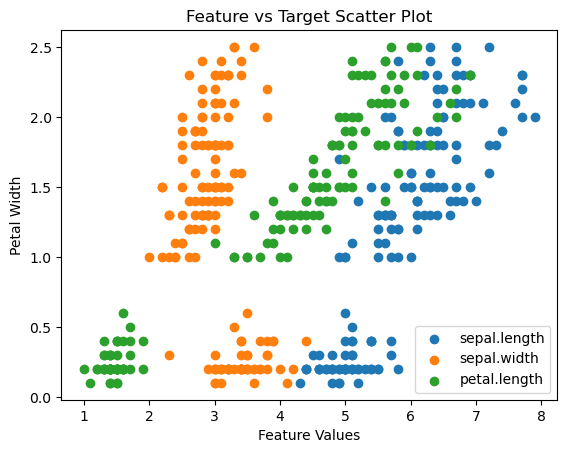

In [4]:
# [1-3] 탐색적 분석 - 시각화

featureDF = iris_df[['sepal.length', 'sepal.width', 'petal.length']] # 2차원
targetSR = iris_df['petal.width']	# 1차원

for column in featureDF.columns:
	plt.scatter(featureDF[column], targetSR, label=column)

plt.xlabel('Feature Values')
plt.ylabel('Petal Width')
plt.legend()
plt.title('Feature vs Target Scatter Plot')
plt.show()

In [5]:
# [1-4] 탐색적 분석 - 상관게수
iris_df.corr()['petal.width']

sepal.length    0.817941
sepal.width    -0.366126
petal.length    0.962865
petal.width     1.000000
Name: petal.width, dtype: float64

In [6]:
# [1-5] 탐색적 분석 결과
# sepal.length / petal.length와 비교하기로 결정

In [7]:
# [2-1] 데이터셋 준비 => 학습용, 검증용, 테스트용
# 학습용 : 규칙과 패턴 찾기 위해 사용되는 데이터셋
# 검증용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
# 테스트용 : 학습 완료 후 검사용 데이터셋

# 전체 데이터셋에서 학습용 / 테스트용 분리 (70:30 or 80:20)
featureDF = iris_df[iris_df.columns[:-1:2]] # 2차원
targetSR = iris_df['petal.width']	# 1차원

In [8]:
# 학습용 : 테스트용 = 70:30
x_train, y_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=10)

# 학습용 : 검증용 = 80:20
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

In [9]:
# [2-2] 선형회귀 알고리즘 객체 / 인스턴스 생성
plant_model = LinearRegression()

In [10]:
# [2-3] 학습 진행
plant_model.fit(x_train, y_train)

LinearRegression()

In [12]:
# [2-4] 선형식의 모델 파라미터 확인
# 기울기 / 가중치가 더 높을수록 더 많은 영향을 끼친다.
print(f'기울기/가중치 : {plant_model.coef_}, 절편값 : {plant_model.intercept_}')

기울기/가중치 : [-0.06516506  0.43848931], 절편값 : -0.07261630046831424


In [13]:
# [3-1] 학습 평가
# 예측값
pre_y = plant_model.predict(x_train)
print(f'예측값 : {pre_y}')

# 모델 적합도
score = plant_model.score(x_train, pre_y)
print(f'모델 적합도 : {score}')

# 오차 계산
rmse = root_mean_squared_error(y_train, pre_y)
print(f'오차 : {rmse}')

예측값 : [1.59077662 1.05508965 1.39759799 1.23523527 0.31617432 0.17159452
 0.20892694 1.42013079 2.10039757 0.24625937 2.36349116 1.8455871
 2.1329801  1.53212807 0.21544345 1.30338362 0.31617432 1.35374906
 1.77092224 1.97238399 1.78572187 1.9901669  1.49656225 1.98541701
 1.09065547 0.22195995 1.29035061 1.67847449 1.74010632 1.77920536
 0.25929238 1.58127683 1.14102091 0.34047374 1.19138634 1.2725677
 2.14777972 0.13901199 0.21367684 0.26580889 1.77268885 0.07561354
 2.08913117 1.52086167 1.25953469 0.22847646 0.91050985 2.21891135
 0.14552849 1.39583138 0.24150947 0.3013747  1.59077662 1.55167759
 1.75313934 1.97238399 0.21069355 0.32092422 0.23322636 1.89120264
 1.66544147 1.2838341  2.04704884 0.30314131 1.32293314 2.03401583
 0.06611375 2.21416146 1.78395526 0.23974286 0.2853584  1.96586749
 0.32092422 0.24625937 1.72883992 1.50959527 2.32615873 1.83432069
 1.36026556 1.91550205 1.04857315 0.32269083 1.74838944 1.48352924]
모델 적합도 : 1.0
오차 : 0.2094252301160179


In [14]:
# [3-1] 모델 성능 평가 : 검증 데이터가 필요함
# 결과값 : 0.0 ~ 1.0
# 분석 : 1.0에 가까울수록 성능이 좋음

score = plant_model.score(x_val, y_val)

print(f'모델 성능평가 점수 : {score}')

모델 성능평가 점수 : 0.9624680101886084


In [15]:
# [3-2] 손실 계산 : 검증용 데이터셋으로 예측값 추출 => 손실계산
pre_y = plant_model.predict(x_val)

# 오차의 제곱값 기준 (평균)
mse = mean_squared_error(y_val, pre_y)
# 오차의 절댓값 기준 (평균)
mae = mean_absolute_error(y_val, pre_y)

print(mse)
print(mae)

0.02508941178321601
0.11717975840909954


In [22]:
# [4-1] 예측 서비스
# 임의의 데이터 생성
num1 = float(input('sepal.length를 입력하세요 : '))
num2 = float(input('sepal.width를 입력하세요 : '))

# 모델이 학습한 특성 개수 확인
print(f"모델이 기대하는 특성 개수: {plant_model.n_features_in_}")

# 올바른 입력 데이터 구성
new_data = pd.DataFrame([[num1, num2]], columns=["sepal.length", "sepal.width"])  # 모델이 학습한 특성 개수에 맞춤

# 예측 수행
pre_width = plant_model.predict(new_data)

print(f'예상 너비 : {pre_width[0]}')

모델이 기대하는 특성 개수: 2


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- sepal.width
Feature names seen at fit time, yet now missing:
- petal.length
